# Cross-Validation Model I

# Cyclical LR- Triangular

# Dropout

## Batch size = 32; Epochs = 100; Hidden layers = 12,2,2,2,2; Optimizer = ADAM


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow as tf
import random as rn
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import LSTM
from keras.layers import Dense, LSTM, Dropout, Activation, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import os
from keras import optimizers
from keras.layers import GRU

from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline

os.environ['PYTHONHASHSEED'] = '0'

np.random.seed(2017)  
rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/

#session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
#                              inter_op_parallelism_threads=1, allow_soft_placement=True, device_count = {'CPU': 1})

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

#tf.set_random_seed(1234)

#sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
#K.set_session(sess)

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Data

In [ ]:
#link ='https://drive.google.com/open?id=1_gf6lVsSBCoGFlyl6rF2ebZ21-0VGf18'
#id = '1TdvPd2nLn9gOJfvUthHgHmrmqvXeESfh'
id = '1E2wviJV2W6SImpK-iRjTsPcOBvVx3iIo'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('target 2.csv')  

In [ ]:
import numpy as np
import tensorflow as tf
import random as rn
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import SimpleRNN
from keras.layers import Dense, LSTM, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
from keras import optimizers

In [ ]:
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline

os.environ['PYTHONHASHSEED'] = '0'

np.random.seed(2017)  
rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed


In [ ]:
xy = pd.read_csv('target 2.csv', skiprows=(10))
print(xy.head(10))

        LAT       LON  YEAR  MO  DY  Insolation     1     4    11    12    14
0  22.71961  75.85771  1983   7   2        2.94  1.48  2.47  4.26  4.46  3.84
1  22.71961  75.85771  1983   7   3        3.26  2.10  4.40  4.33  2.79  2.82
2  22.71961  75.85771  1983   7   4        6.09  5.55  4.76  5.60  5.69  5.88
3  22.71961  75.85771  1983   7   5        5.64  5.79  5.48  5.75  5.40  5.67
4  22.71961  75.85771  1983   7   6        6.33  5.78  6.33  6.06  5.97  7.03
5  22.71961  75.85771  1983   7   7        5.90  5.92  6.98  6.21  5.84  4.64
6  22.71961  75.85771  1983   7   8        5.58  6.07  6.59  5.92  6.16  4.44
7  22.71961  75.85771  1983   7   9        6.14  6.27  5.37  5.90  7.11  6.68
8  22.71961  75.85771  1983   7  10        4.61  5.48  5.00  5.91  4.48  3.80
9  22.71961  75.85771  1983   7  11        5.88  5.56  3.96  5.79  4.70  3.93


In [ ]:
xy = xy.drop(columns=['LAT', 'LON', '11', '14'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
xy = xy.replace(-999, np.nan)
#x2 = x2.replace(-999, np.nan)
#x3 = x3.replace(-999, np.nan)

xy = xy.fillna(xy.mean())
#x2 = x2.fillna(x2.mean())
#x3 = x3.fillna(x3.mean())

In [ ]:
xy = xy.set_index(['YEAR', 'MO', 'DY'])
xy.columns

Index(['Insolation', '1', '4', '12'], dtype='object')

# division

In [ ]:
xy.describe()

,Insolation,1,4,12
count,13000.000000,13000.000000,13000.00000,13000.000000
mean,5.173968,5.204824,5.17300,5.169313
std,1.383432,1.370288,1.40143,1.400469
min,0.160000,0.170000,0.18000,0.150000
25%,4.440000,4.450000,4.43000,4.377500
50%,5.160000,5.200000,5.19000,5.160000
75%,6.110000,6.120000,6.15000,6.150000
max,8.660000,8.270000,8.27000,8.320000


In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
values = xy.values
# ensure all data is float
values = values.astype('float32')
## normalize features
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(values, 9, 1)
# drop columns we don't want to predict
print(reframed.head())

    var1(t-9)  var2(t-9)  var3(t-9)  ...  var2(t)  var3(t)  var4(t)
9        2.94       1.48       2.47  ...     5.56     3.96     4.70
10       3.26       2.10       4.40  ...     6.10     4.77     5.05
11       6.09       5.55       4.76  ...     7.18     4.68     4.77
12       5.64       5.79       5.48  ...     4.06     6.42     5.40
13       6.33       5.78       6.33  ...     4.09     5.21     3.50

[5 rows x 40 columns]


In [ ]:
reframed.columns

Index(['var1(t-9)', 'var2(t-9)', 'var3(t-9)', 'var4(t-9)', 'var1(t-8)',
       'var2(t-8)', 'var3(t-8)', 'var4(t-8)', 'var1(t-7)', 'var2(t-7)',
       'var3(t-7)', 'var4(t-7)', 'var1(t-6)', 'var2(t-6)', 'var3(t-6)',
       'var4(t-6)', 'var1(t-5)', 'var2(t-5)', 'var3(t-5)', 'var4(t-5)',
       'var1(t-4)', 'var2(t-4)', 'var3(t-4)', 'var4(t-4)', 'var1(t-3)',
       'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var1(t-2)', 'var2(t-2)',
       'var3(t-2)', 'var4(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)',
       'var4(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)'],
      dtype='object')

In [ ]:
reframed = reframed[['var1(t-9)', 'var2(t-9)', 'var3(t-9)', 'var4(t-9)', 'var1(t-8)',
       'var2(t-8)', 'var3(t-8)', 'var4(t-8)', 'var1(t-7)', 'var2(t-7)',
       'var3(t-7)', 'var4(t-7)', 'var1(t-6)', 'var2(t-6)', 'var3(t-6)',
       'var4(t-6)', 'var1(t-5)', 'var2(t-5)', 'var3(t-5)', 'var4(t-5)',
       'var1(t-4)', 'var2(t-4)', 'var3(t-4)', 'var4(t-4)', 'var1(t-3)',
       'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var1(t-2)', 'var2(t-2)',
       'var3(t-2)', 'var4(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)',
       'var4(t-1)', 'var1(t)']]
reframed.columns

Index(['var1(t-9)', 'var2(t-9)', 'var3(t-9)', 'var4(t-9)', 'var1(t-8)',
       'var2(t-8)', 'var3(t-8)', 'var4(t-8)', 'var1(t-7)', 'var2(t-7)',
       'var3(t-7)', 'var4(t-7)', 'var1(t-6)', 'var2(t-6)', 'var3(t-6)',
       'var4(t-6)', 'var1(t-5)', 'var2(t-5)', 'var3(t-5)', 'var4(t-5)',
       'var1(t-4)', 'var2(t-4)', 'var3(t-4)', 'var4(t-4)', 'var1(t-3)',
       'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var1(t-2)', 'var2(t-2)',
       'var3(t-2)', 'var4(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)',
       'var4(t-1)', 'var1(t)'],
      dtype='object')

In [ ]:
reframed.shape

(12991, 37)

In [ ]:
values = reframed.values

(12991, 36)
(12991, 1)
[[0.32705882 0.16172838 0.2830655  0.5275398  0.3647059  0.23827156
  0.52163166 0.3231334  0.6976471  0.66419756 0.56613106 0.6780906
  0.6447059  0.69382715 0.6551298  0.6425949  0.72588235 0.6925926
  0.76019776 0.7123623  0.67529416 0.70987654 0.84054387 0.6964504
  0.6376471  0.72839504 0.7923362  0.7356181  0.7035294  0.7530864
  0.6415327  0.8518972  0.52352947 0.65555555 0.5957973  0.52998775]
 [0.3647059  0.23827156 0.52163166 0.3231334  0.6976471  0.66419756
  0.56613106 0.6780906  0.6447059  0.69382715 0.6551298  0.6425949
  0.72588235 0.6925926  0.76019776 0.7123623  0.67529416 0.70987654
  0.84054387 0.6964504  0.6376471  0.72839504 0.7923362  0.7356181
  0.7035294  0.7530864  0.6415327  0.8518972  0.52352947 0.65555555
  0.5957973  0.52998775 0.6729412  0.6654321  0.4672435  0.5569155 ]
 [0.6976471  0.66419756 0.56613106 0.6780906  0.6447059  0.69382715
  0.6551298  0.6425949  0.72588235 0.6925926  0.76019776 0.7123623
  0.67529416 0.70987654 0.8405

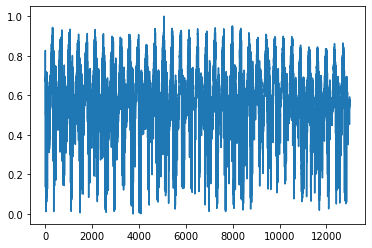

In [ ]:
dataset = np.array(values)
x = dataset[:,0:36]
y = dataset[:,[36]]


scaler1 = MinMaxScaler(feature_range=(0, 1))
x = scaler1.fit_transform(x)
scaler2 = MinMaxScaler(feature_range=(0, 1))
y = scaler2.fit_transform(y)

print(x.shape)
print(y.shape)
print(x[0:10])
print(y[0:10])

import matplotlib.pyplot as plt
plt.figure()
plt.plot(y)

In [ ]:
x.shape, y.shape

((12991, 36), (12991, 1))

# Split I

In [ ]:
# split to train and testing
train_size = 5196
test_size = 2598
test_index = train_size + test_size
trainX, testX = np.array(x[0:train_size]), np.array(
    x[train_size:test_index])
trainY, testY = np.array(y[0:train_size]), np.array(
    y[train_size:test_index])

print(len(trainX))
print(len(testX))

5196
2598


In [ ]:
trainX.shape

(5196, 36)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 9, 4))
testX = np.reshape(testX, (testX.shape[0], 9, 4))

print(trainX)

[[[0.32705882 0.16172838 0.2830655  0.5275398 ]
  [0.3647059  0.23827156 0.52163166 0.3231334 ]
  [0.6976471  0.66419756 0.56613106 0.6780906 ]
  ...
  [0.6376471  0.72839504 0.7923362  0.7356181 ]
  [0.7035294  0.7530864  0.6415327  0.8518972 ]
  [0.52352947 0.65555555 0.5957973  0.52998775]]

 [[0.3647059  0.23827156 0.52163166 0.3231334 ]
  [0.6976471  0.66419756 0.56613106 0.6780906 ]
  [0.6447059  0.69382715 0.6551298  0.6425949 ]
  ...
  [0.7035294  0.7530864  0.6415327  0.8518972 ]
  [0.52352947 0.65555555 0.5957973  0.52998775]
  [0.6729412  0.6654321  0.4672435  0.5569155 ]]

 [[0.6976471  0.66419756 0.56613106 0.6780906 ]
  [0.6447059  0.69382715 0.6551298  0.6425949 ]
  [0.72588235 0.6925926  0.76019776 0.7123623 ]
  ...
  [0.52352947 0.65555555 0.5957973  0.52998775]
  [0.6729412  0.6654321  0.4672435  0.5569155 ]
  [0.75411767 0.73209876 0.56736714 0.5997552 ]]

 ...

 [[0.5894118  0.645679   0.5241038  0.6364749 ]
  [0.662353   0.5888889  0.5067985  0.61566705]
  [0.38941

In [ ]:
from keras.callbacks import Callback
import keras.backend as K
import numpy as np

class SGDRScheduler(Callback):
    '''Cosine annealing learning rate scheduler with periodic restarts.
    # Usage
        ```python
            schedule = SGDRScheduler(min_lr=1e-5,
                                     max_lr=1e-2,
                                     steps_per_epoch=np.ceil(epoch_size/batch_size),
                                     lr_decay=0.9,
                                     cycle_length=5,
                                     mult_factor=1.5)
            model.fit(X_train, Y_train, epochs=100, callbacks=[schedule])
        ```
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        lr_decay: Reduce the max_lr after the completion of each cycle.
                  Ex. To reduce the max_lr by 20% after each cycle, set this value to 0.8.
        cycle_length: Initial number of epochs in a cycle.
        mult_factor: Scale epochs_to_restart after each full cycle completion.
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: http://arxiv.org/abs/1608.03983
    '''
    def __init__(self,
                 min_lr,
                 max_lr,
                 steps_per_epoch,
                 lr_decay=1,
                 cycle_length=10,
                 mult_factor=2):

        self.min_lr = min_lr
        self.max_lr = max_lr
        self.lr_decay = lr_decay

        self.batch_since_restart = 0
        self.next_restart = cycle_length

        self.steps_per_epoch = steps_per_epoch

        self.cycle_length = cycle_length
        self.mult_factor = mult_factor

        self.history = {}

    def clr(self):
        '''Calculate the learning rate.'''
        fraction_to_restart = self.batch_since_restart / (self.steps_per_epoch * self.cycle_length)
        lr = self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(fraction_to_restart * np.pi))
        return lr

    def on_train_begin(self, logs={}):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.max_lr)

    def on_batch_end(self, batch, logs={}):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

        self.batch_since_restart += 1
        K.set_value(self.model.optimizer.lr, self.clr())

    def on_epoch_end(self, epoch, logs={}):
        '''Check for end of current cycle, apply restarts when necessary.'''
        if epoch + 1 == self.next_restart:
            self.batch_since_restart = 0
            self.cycle_length = np.ceil(self.cycle_length * self.mult_factor)
            self.next_restart += self.cycle_length
            self.max_lr *= self.lr_decay
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs={}):
        '''Set weights to the values from the end of the most recent cycle for best performance.'''
        self.model.set_weights(self.best_weights)

In [ ]:
epoch_size=len(trainX)
batch_size=32
print(trainX.shape, trainY.shape)

schedule = SGDRScheduler(min_lr=1e-5, max_lr=1e-2, steps_per_epoch=np.ceil(epoch_size/batch_size), lr_decay=0.9, cycle_length=5, mult_factor=1.5)

(5196, 9, 4) (5196, 1)


In [ ]:
from keras import regularizers

model = Sequential()
model.add(LSTM(12, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(2, return_sequences=True))
model.add(LSTM(2, return_sequences=True))
model.add(LSTM(2, return_sequences=True))
model.add(LSTM(2, return_sequences=False))
model.add(Dense(trainY.shape[1]))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9, 12)             816       
_________________________________________________________________
dropout (Dropout)            (None, 9, 12)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 2)              120       
_________________________________________________________________
lstm_2 (LSTM)                (None, 9, 2)              40        
_________________________________________________________________
lstm_3 (LSTM)                (None, 9, 2)              40        
_________________________________________________________________
lstm_4 (LSTM)                (None, 2)                 40        
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [ ]:
history=model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split = 0.2, callbacks=[schedule])

Epoch 1/100
130/130 [==============================] - 4s 32ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 3/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 4/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 5/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 6/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 7/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 8/100
130/130 [==============================] - 2s 19ms

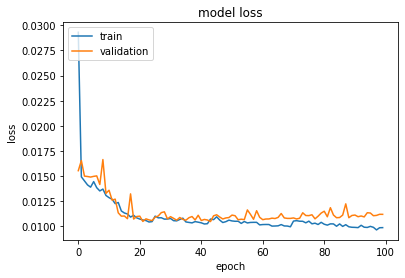

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model

model.save('model_10rnnadam.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

In [ ]:
trainPredict1 = model.predict(trainX)
testPredict1 = model.predict(testX)

 

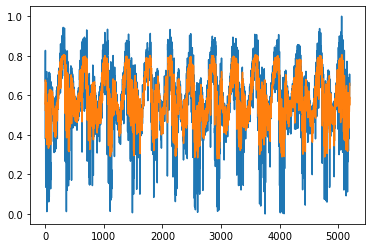

In [ ]:
plt.plot(trainY)
plt.plot(trainPredict1)
plt.show()

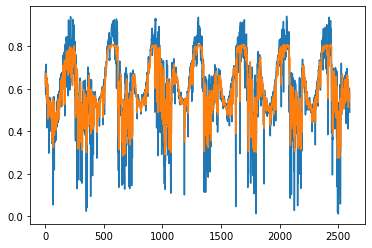

In [ ]:
plt.plot(testY)
plt.plot(testPredict1)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
MSE1=mean_squared_error(testY, testPredict1)
print("MSE:",MSE1)

RMSE1=sqrt(MSE1)
print("RMSE:",RMSE1)

from sklearn.metrics import r2_score
R2_score1=r2_score(testY, testPredict1)
print("R2 score:", R2_score1)

MSE: 0.008329601
RMSE: 0.09126664794475293
R2 score: 0.7020247980041953


# Split II

In [ ]:
# split to train and testing
trainX2, testX2 = np.array(x[2598:7794]), np.array(
    x[7794:10392])
trainY2, testY2 = np.array(y[2598:7794]), np.array(
    y[7794:10392])

print(len(trainX2))
print(len(testX2))

5196
2598


In [ ]:
# reshape input to be [samples, time steps, features]
trainX2 = np.reshape(trainX2, (trainX2.shape[0], 9, 4))
testX2 = np.reshape(testX2, (testX2.shape[0], 9, 4))

print(trainX2)

[[[0.3635294  0.4716049  0.4437577  0.4124847 ]
  [0.36235294 0.47407407 0.4239802  0.3390453 ]
  [0.43294117 0.6259259  0.6081582  0.7356181 ]
  ...
  [0.31764704 0.43580246 0.46106303 0.5850673 ]
  [0.25411764 0.15185183 0.15822002 0.14443085]
  [0.20235294 0.3691358  0.21137205 0.34638923]]

 [[0.36235294 0.47407407 0.4239802  0.3390453 ]
  [0.43294117 0.6259259  0.6081582  0.7356181 ]
  [0.31882352 0.5111111  0.28182942 0.41126072]
  ...
  [0.25411764 0.15185183 0.15822002 0.14443085]
  [0.20235294 0.3691358  0.21137205 0.34638923]
  [0.33294117 0.28148147 0.39802226 0.3512852 ]]

 [[0.43294117 0.6259259  0.6081582  0.7356181 ]
  [0.31882352 0.5111111  0.28182942 0.41126072]
  [0.22588234 0.14074072 0.4054388  0.4773562 ]
  ...
  [0.20235294 0.3691358  0.21137205 0.34638923]
  [0.33294117 0.28148147 0.39802226 0.3512852 ]
  [0.32705882 0.35925922 0.06922126 0.4651163 ]]

 ...

 [[0.5658824  0.6234568  0.6229913  0.60954714]
  [0.5682353  0.61604935 0.6093943  0.5777234 ]
  [0.55529

In [ ]:
from keras import regularizers

model = load_model('model_10rnnadam.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9, 12)             816       
_________________________________________________________________
dropout (Dropout)            (None, 9, 12)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 2)              120       
_________________________________________________________________
lstm_2 (LSTM)                (None, 9, 2)              40        
_________________________________________________________________
lstm_3 (LSTM)                (None, 9, 2)              40        
_________________________________________________________________
lstm_4 (LSTM)                (None, 2)                 40        
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [ ]:
print(trainX2.shape, trainY2.shape)
history2=model.fit(trainX2, trainY2, epochs=100, batch_size=32, validation_split = 0.2, callbacks=[schedule])

(5196, 9, 4) (5196, 1)
Epoch 1/100
130/130 [==============================] - 4s 31ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 2/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 3/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 4/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 5/100
130/130 [==============================] - 3s 19ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 6/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0092 - val_mean_squared_error: 

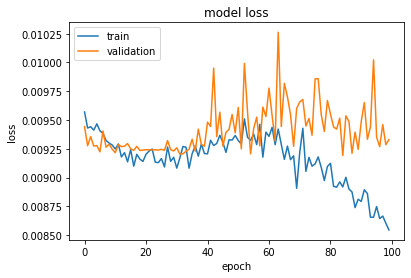

In [ ]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('model_10rnnadam.h5')

In [ ]:
trainPredict2 = model.predict(trainX2)
testPredict2 = model.predict(testX2)

 

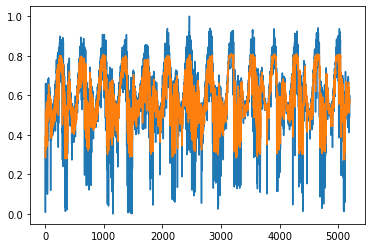

In [ ]:
plt.plot(trainY2)
plt.plot(trainPredict2)
plt.show()

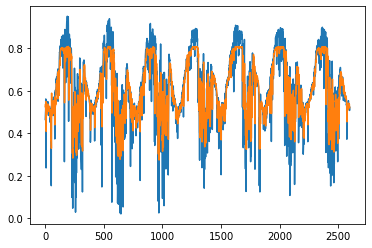

In [ ]:
plt.plot(testY2)
plt.plot(testPredict2)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
MSE2=mean_squared_error(testY2, testPredict2)
print("MSE:",MSE2)

RMSE2=sqrt(MSE2)
print("RMSE:",RMSE2)

from sklearn.metrics import r2_score
R2_score2=r2_score(testY2, testPredict2)
print("R2 score:", R2_score2)

MSE: 0.00817252
RMSE: 0.09040199354188232
R2 score: 0.7059321860635098


# Split III

In [ ]:
# split to train and testing
trainX3, testX3 = np.array(x[5196:10392]), np.array(
    x[10392:12991])
trainY3, testY3 = np.array(y[5196:10392]), np.array(
    y[10392:12991])

print(len(trainX3))
print(len(testX3))

5196
2599


In [ ]:
# reshape input to be [samples, time steps, features]
trainX3 = np.reshape(trainX3, (trainX3.shape[0], 9, 4))
testX3 = np.reshape(testX3, (testX3.shape[0], 9, 4))

print(trainX3)

[[[0.5588235  0.59876543 0.7354759  0.5091799 ]
  [0.52000004 0.62469137 0.57601976 0.5764994 ]
  [0.5952941  0.5901234  0.5846724  0.49449205]
  ...
  [0.70705885 0.74197525 0.69715697 0.78824973]
  [0.65411764 0.72839504 0.7935723  0.74541   ]
  [0.6517647  0.63209873 0.78615576 0.62913096]]

 [[0.52000004 0.62469137 0.57601976 0.5764994 ]
  [0.5952941  0.5901234  0.5846724  0.49449205]
  [0.58117646 0.6283951  0.58343637 0.5924112 ]
  ...
  [0.65411764 0.72839504 0.7935723  0.74541   ]
  [0.6517647  0.63209873 0.78615576 0.62913096]
  [0.6811765  0.6061728  0.70333743 0.7368421 ]]

 [[0.5952941  0.5901234  0.5846724  0.49449205]
  [0.58117646 0.6283951  0.58343637 0.5924112 ]
  [0.5835294  0.6135802  0.6415327  0.6842105 ]
  ...
  [0.6517647  0.63209873 0.78615576 0.62913096]
  [0.6811765  0.6061728  0.70333743 0.7368421 ]
  [0.6447059  0.66419756 0.68355995 0.6560588 ]]

 ...

 [[0.5529412  0.5814815  0.57601976 0.5642595 ]
  [0.5470588  0.5728395  0.57107544 0.56181145]
  [0.52470

In [ ]:
from keras import regularizers

model = load_model('model_10rnnadam.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9, 12)             816       
_________________________________________________________________
dropout (Dropout)            (None, 9, 12)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 2)              120       
_________________________________________________________________
lstm_2 (LSTM)                (None, 9, 2)              40        
_________________________________________________________________
lstm_3 (LSTM)                (None, 9, 2)              40        
_________________________________________________________________
lstm_4 (LSTM)                (None, 2)                 40        
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [ ]:
print(trainX3.shape, trainY3.shape)
history3=model.fit(trainX3, trainY3, epochs=100, batch_size=32, validation_split = 0.2, callbacks=[schedule])

(5196, 9, 4) (5196, 1)
Epoch 1/100
130/130 [==============================] - 4s 31ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 2/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 3/100
130/130 [==============================] - 3s 19ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 4/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 5/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 6/100
130/130 [==============================] - 2s 19ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0067 - val_mean_squared_error: 

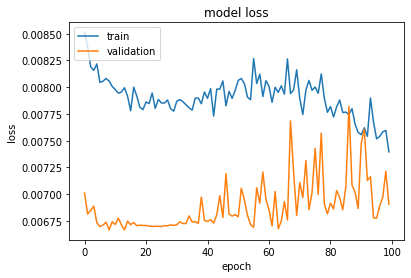

In [ ]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('model_10rnnadam.h5')

In [ ]:
trainPredict3 = model.predict(trainX3)
testPredict3 = model.predict(testX3)

 

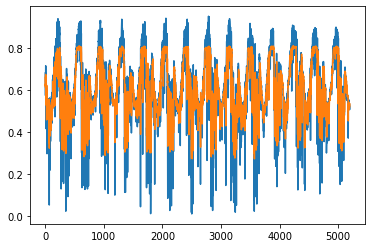

In [ ]:
plt.plot(trainY3)
plt.plot(trainPredict3)
plt.show()

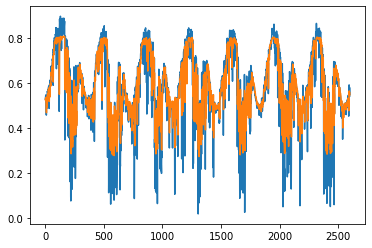

In [ ]:
plt.plot(testY3)
plt.plot(testPredict3)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
MSE3=mean_squared_error(testY3, testPredict3)
print("MSE:",MSE3)

RMSE3=sqrt(MSE3)
print("RMSE:",RMSE3)

from sklearn.metrics import r2_score
R2_score3=r2_score(testY3, testPredict3)
print("R2 score:", R2_score3)

MSE: 0.007677922
RMSE: 0.08762375263205129
R2 score: 0.7310686064969198


In [ ]:
AvMSE=(MSE1+MSE2+MSE3)/3
AvRMSE=(RMSE1+RMSE2+RMSE3)/3
Avr2=(R2_score1+R2_score2+R2_score3)/3

print("Average MSE:",AvMSE)
print("Average RMSE:",AvRMSE)
print("Average R2 score:",Avr2)

Average MSE: 0.008060014496246973
Average RMSE: 0.08976413137289552
Average R2 score: 0.7130085301882083
